In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [9]:
# Load the dataset
file_path = "housing.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Drop missing values
df = df.dropna()

In [10]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Apply Sturge's Rule for stratified split
target_column = "median_house_value"
num_bins = int(1 + 3.322 * np.log10(len(df)))
df["strat_category"] = pd.qcut(df[target_column], q=num_bins, labels=False)

# Define features and target
X = df.drop(columns=[target_column, "strat_category"], errors="ignore")
y = df[target_column]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=df["strat_category"], random_state=42
)

In [11]:
# Train Ridge and Lasso regression models
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

In [12]:
# Function to calculate MAE, MSE, RMSE
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Get metrics for both models
ridge_metrics = regression_metrics(y_test, y_pred_ridge)
lasso_metrics = regression_metrics(y_test, y_pred_lasso)

In [13]:
# Print results
print("📌 Ridge Regression Metrics:")
print(f"  - MAE  : {ridge_metrics[0]:.4f}")
print(f"  - MSE  : {ridge_metrics[1]:.4f}")
print(f"  - RMSE : {ridge_metrics[2]:.4f}")

print("\n📌 Lasso Regression Metrics:")
print(f"  - MAE  : {lasso_metrics[0]:.4f}")
print(f"  - MSE  : {lasso_metrics[1]:.4f}")
print(f"  - RMSE : {lasso_metrics[2]:.4f}")

📌 Ridge Regression Metrics:
  - MAE  : 50064.1990
  - MSE  : 4726337499.2374
  - RMSE : 68748.3636

📌 Lasso Regression Metrics:
  - MAE  : 50066.6749
  - MSE  : 4726560125.7351
  - RMSE : 68749.9827


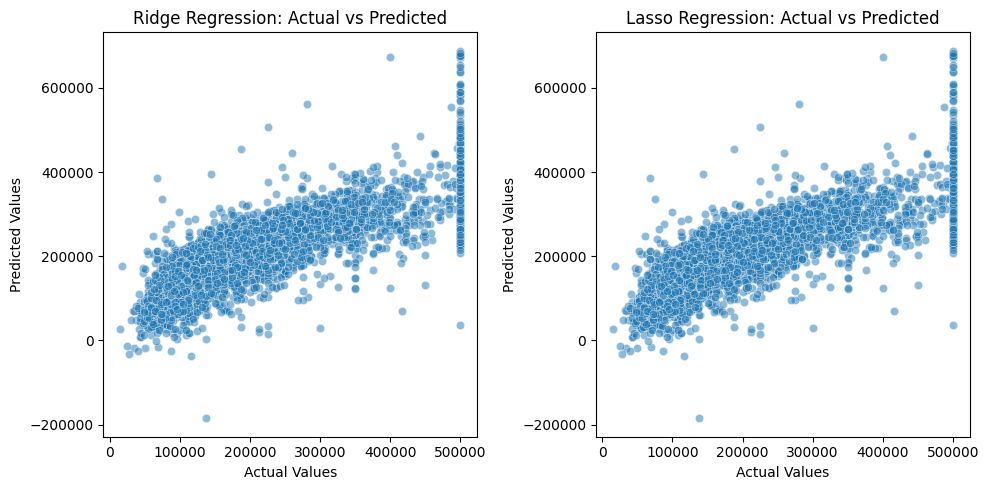

In [14]:
# Plot predictions vs actual values
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted")

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs Predicted")

plt.tight_layout()
plt.show()